## Dataset Source - https://archive.ics.uci.edu/ml/datasets/Facebook+metrics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset Analysis

In [2]:
df = pd.read_csv("dataset_Facebook.csv",delimiter=';')

In [3]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [5]:
df_copy = df.copy()

In [6]:
df.drop(df.columns[7:15],axis=1,inplace=True)

In [7]:
df.drop(['Paid'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Page total likes    500 non-null    int64  
 1   Type                500 non-null    object 
 2   Category            500 non-null    int64  
 3   Post Month          500 non-null    int64  
 4   Post Weekday        500 non-null    int64  
 5   Post Hour           500 non-null    int64  
 6   comment             500 non-null    int64  
 7   like                499 non-null    float64
 8   share               496 non-null    float64
 9   Total Interactions  500 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 39.2+ KB


In [9]:
df['like'].describe(), df['share'].describe(),df['comment'].describe()

(count     499.000000
 mean      177.945892
 std       323.398742
 min         0.000000
 25%        56.500000
 50%       101.000000
 75%       187.500000
 max      5172.000000
 Name: like, dtype: float64,
 count    496.000000
 mean      27.266129
 std       42.613292
 min        0.000000
 25%       10.000000
 50%       19.000000
 75%       32.250000
 max      790.000000
 Name: share, dtype: float64,
 count    500.00000
 mean       7.48200
 std       21.18091
 min        0.00000
 25%        1.00000
 50%        3.00000
 75%        7.00000
 max      372.00000
 Name: comment, dtype: float64)

In [10]:
df['like'].fillna(0,inplace=True)
df['share'].fillna(0,inplace=True)
df['comment'].fillna(0,inplace=True)

Text(0.5, 1.0, 'Distribution of Total Page Likes')

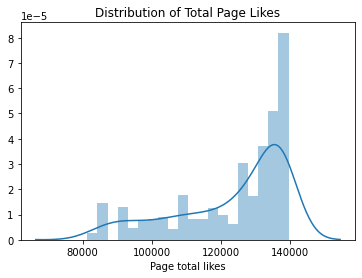

In [11]:
sns.distplot(df['Page total likes'],bins=20)
plt.title("Distribution of Total Page Likes")

Text(0.5, 1.0, 'Distribution of Like/Post')

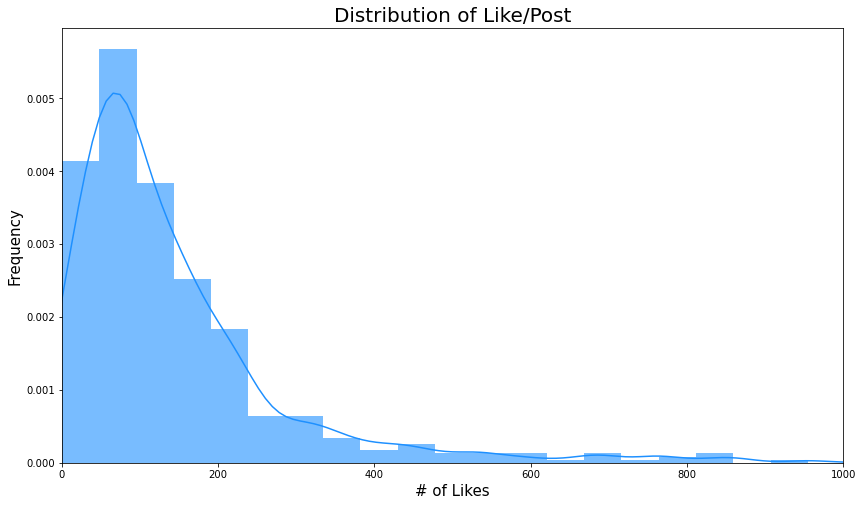

In [12]:
plt.figure(figsize=(14,8))
sns.distplot(df[df['like']<1000]['like'],bins=20,color='dodgerblue',hist_kws={'alpha':0.6})
plt.xlim(0,1000)
plt.xlabel("# of Likes",fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Distribution of Like/Post',fontsize=20)
#plt.savefig('NumLikes.png', bbox_inches='tight')

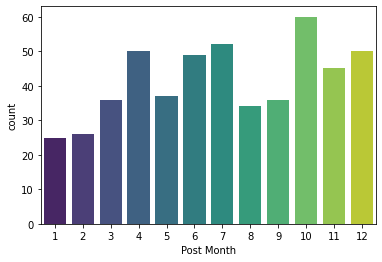

In [13]:
sns.countplot(df['Post Month'],palette='viridis')
#plt.savefig('monthCount.png', bbox_inches='tight')

#### From the Month wie analysis, we can observe that in the month OF October, there is maximum post engagement.

Text(0.5, 1.0, 'Frequency of Posts by Weekday')

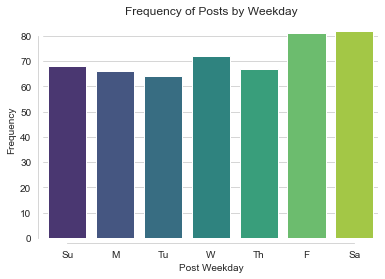

In [14]:
from collections import OrderedDict
sns.set_style("whitegrid")

f, ax = plt.subplots()
sns.countplot(df['Post Weekday'],palette='viridis')
handles = ["Su", "M", "Tu", "W", "Th", "F",'Sa']
labels = [0,1,2,3,4,5,6]
plt.xticks(labels, handles)
ax.set_ylabel("Frequency")
sns.despine(offset = 5, trim = True)
plt.title("Frequency of Posts by Weekday")
#plt.savefig('dayCount.png', bbox_inches='tight')

#### And also fro the weekday analysis, it can be visible that on Friday, Saturday, there is maximum post.

Text(0.5, 1.0, 'Frequency of Posts by Hour')

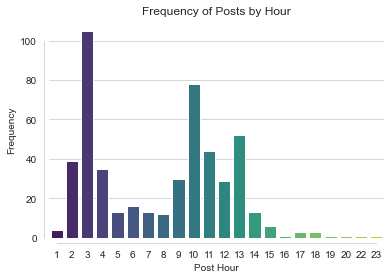

In [15]:

sns.set_style("whitegrid")

f, ax = plt.subplots()
sns.countplot(df['Post Hour'],palette='viridis',)
#handles = ["Su", "M", "Tu", "W", "Th", "F",'Sa']
#labels = [0,1,2,3,4,5,6]
#plt.xticks(labels, handles)
ax.set_ylabel("Frequency")
sns.despine(offset = 5, trim = True)
plt.title("Frequency of Posts by Hour")
#plt.savefig('hourCount.png', bbox_inches='tight')

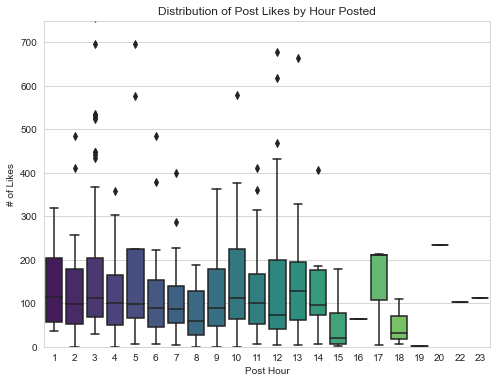

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Post Hour',y='like',data=df,palette='viridis')
plt.ylim(0,750)
plt.title("Distribution of Post Likes by Hour Posted")
plt.ylabel("# of Likes")
plt.savefig('hourBox.png', bbox_inches='tight')

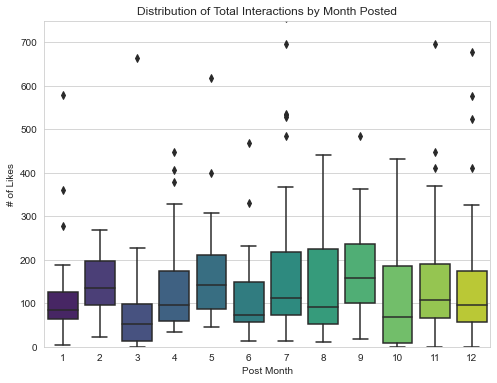

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Post Month',y='like',data=df,palette='viridis')
plt.ylim(0,750)
plt.title("Distribution of Total Interactions by Month Posted")
plt.ylabel("# of Likes")
plt.savefig('monthBox.png', bbox_inches='tight')

### Post Types Vs Likes

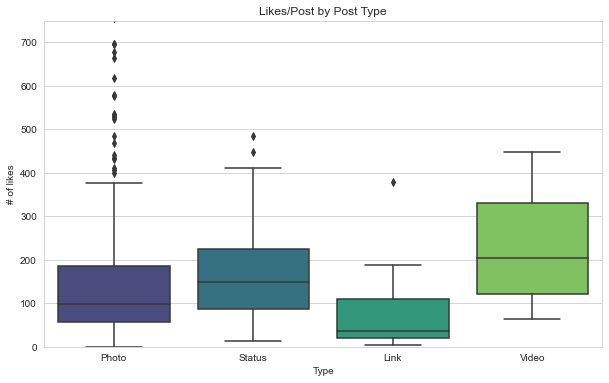

In [18]:

plt.figure(figsize=(10,6))
sns.boxplot(x='Type',y='like',data=df,palette='viridis')
plt.ylim(0,750)
#sns.despine(offset=4,bottom=True)
plt.title("Likes/Post by Post Type")
plt.ylabel("# of likes")
#plt.legend(loc='upper left')
plt.savefig('typeBox.png', bbox_inches='tight')

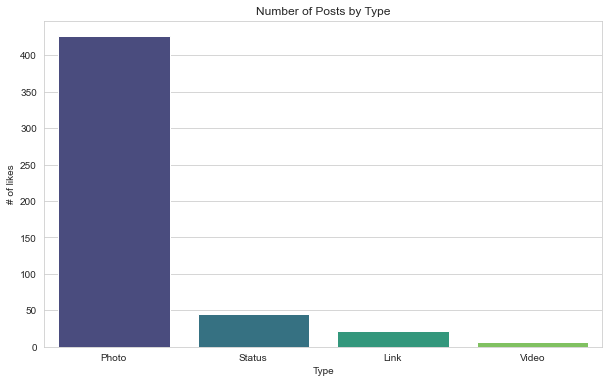

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='Type',data=df,palette='viridis')
#plt.ylim(0,750)
#sns.despine(offset=4,bottom=True)
plt.title("Number of Posts by Type")
plt.ylabel("# of likes")
#plt.legend(loc='upper left')
plt.savefig('typeCount.png', bbox_inches='tight')

#### Which days and hours are the best for posting.

In [20]:
timePivot = pd.pivot_table(df,aggfunc='median',
                           columns='Post Hour',
                           index='Post Weekday',
                           values='like')
timePivot = timePivot[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

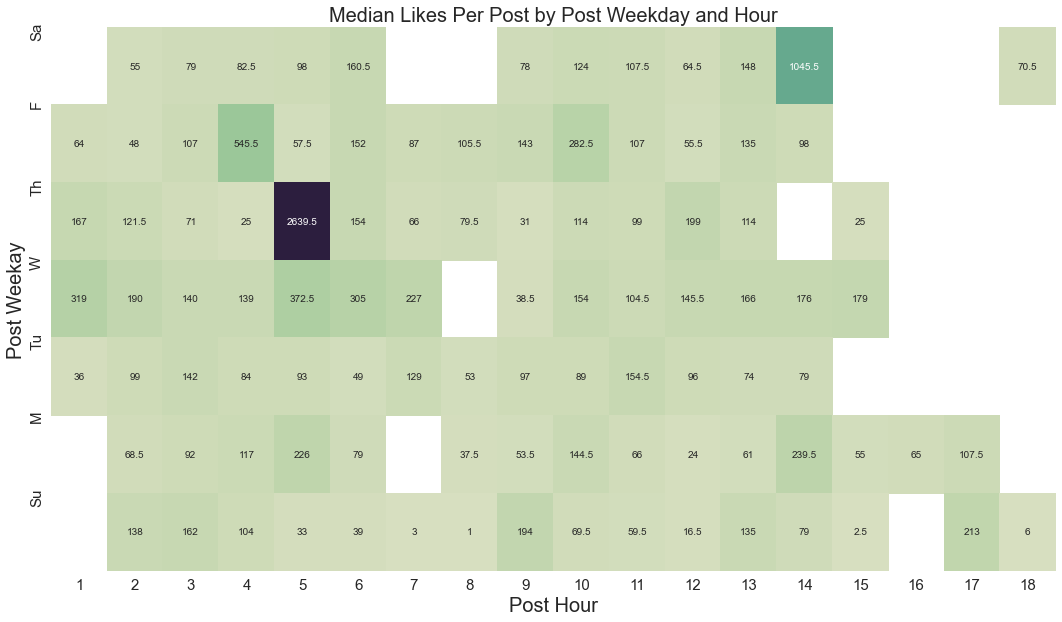

In [21]:
plt.figure(figsize=(18,10))
cmap= sns.cubehelix_palette(8, start=.5, rot=-.75,as_cmap=True)
sns.heatmap(timePivot,cbar=False,cmap=cmap,annot=True, fmt='g')
#plt.pcolor(lnch_pivot,cmap=plt.cm.Blues, alpha=0.8)
plt.yticks(np.arange(7),['Sa','F','Th','W','Tu','M','Su'],fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Post Weekay',fontsize=20)
plt.xlabel('Post Hour',fontsize=20)
plt.title('Median Likes Per Post by Post Weekday and Hour',fontsize=20)
plt.savefig('medianLikeHeatmap.png', bbox_inches='tight')

### Post Modeling

In [22]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [23]:
#df['like'].describe()

In [24]:
#Removing Outliers

outlierCut = np.percentile(df['like'],90)
outlierCut

330.1

In [25]:
df = df[df['like']<outlierCut]

In [26]:
def Weekday(x):
    if x == 1:
        return 'Su'
    elif x== 2:
        return 'Mo'
    elif x == 3:
        return 'Tu'
    elif x == 4:
        return 'We'
    elif x == 5:
        return 'Th'
    elif x ==6:
        return 'Fr'
    elif x == 7:
        return "Sa"

df['Weekday'] = df['Post Weekday'].apply(lambda x: Weekday(x))

In [27]:
dayDf = pd.get_dummies(df['Weekday'])

In [28]:

df = pd.concat([df,dayDf],axis=1)

In [29]:
hours = list(range(0,18))
#hours
for i in hours:
    hours[i] = str(hours[i])
    hours[i]='hr_'+ hours[i]
    #print str(hours[i])

In [30]:
hourDf = pd.get_dummies(df['Post Hour'],prefix='hr_')
df = pd.concat([df,hourDf],axis=1)
monthDf = pd.get_dummies(df['Post Month'],prefix='Mo')
df = pd.concat([df,monthDf],axis=1)
df['Video'] = pd.get_dummies(df['Type'])['Video']
df['Status'] = pd.get_dummies(df['Type'])['Status']
df['Photo'] = pd.get_dummies(df['Type'])['Photo']
df['Cat_1'] = pd.get_dummies(df['Category'])[1]
df['Cat_2'] = pd.get_dummies(df['Category'])[2]
#To avoid multicollinearity with the post types I am not including Links

In [31]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,comment,like,share,Total Interactions,...,Mo_8,Mo_9,Mo_10,Mo_11,Mo_12,Video,Status,Photo,Cat_1,Cat_2
0,139441,Photo,2,12,4,3,4,79.0,17.0,100,...,0,0,0,0,1,0,0,1,0,1
1,139441,Status,2,12,3,10,5,130.0,29.0,164,...,0,0,0,0,1,0,1,0,0,1
2,139441,Photo,3,12,3,3,0,66.0,14.0,80,...,0,0,0,0,1,0,0,1,0,0
4,139441,Photo,2,12,2,3,19,325.0,49.0,393,...,0,0,0,0,1,0,0,1,0,1
5,139441,Status,2,12,1,9,1,152.0,33.0,186,...,0,0,0,0,1,0,1,0,0,1


In [32]:
df.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'comment', 'like', 'share', 'Total Interactions',
       'Weekday', 'Fr', 'Mo', 'Sa', 'Su', 'Th', 'Tu', 'We', 'hr__1', 'hr__2',
       'hr__3', 'hr__4', 'hr__5', 'hr__6', 'hr__7', 'hr__8', 'hr__9', 'hr__10',
       'hr__11', 'hr__12', 'hr__13', 'hr__14', 'hr__15', 'hr__16', 'hr__17',
       'hr__18', 'hr__19', 'hr__20', 'hr__22', 'hr__23', 'Mo_1', 'Mo_2',
       'Mo_3', 'Mo_4', 'Mo_5', 'Mo_6', 'Mo_7', 'Mo_8', 'Mo_9', 'Mo_10',
       'Mo_11', 'Mo_12', 'Video', 'Status', 'Photo', 'Cat_1', 'Cat_2'],
      dtype='object')

In [33]:
x = df[['Page total likes','Video','Status','Photo',
    'Cat_1','Cat_2','Mo','Tu','Sa',"We",'Th','Fr',
       'hr__17','hr__1','hr__2','hr__3','hr__4','hr__5', 'hr__6','hr__7','hr__8',
        'hr__9','hr__10','hr__11','hr__12','hr__13','hr__14','hr__15','hr__16','Mo_1',
       'Mo_2','Mo_12','Mo_4','Mo_5','Mo_6','Mo_7','Mo_8','Mo_9','Mo_11','Mo_10']]
y = df['like']

In [41]:
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size=0.1,
                                                  random_state=42)

In [42]:
y_test.count()

45

In [43]:
x_train.columns

Index(['Page total likes', 'Video', 'Status', 'Photo', 'Cat_1', 'Cat_2', 'Mo',
       'Tu', 'Sa', 'We', 'Th', 'Fr', 'hr__17', 'hr__1', 'hr__2', 'hr__3',
       'hr__4', 'hr__5', 'hr__6', 'hr__7', 'hr__8', 'hr__9', 'hr__10',
       'hr__11', 'hr__12', 'hr__13', 'hr__14', 'hr__15', 'hr__16', 'Mo_1',
       'Mo_2', 'Mo_12', 'Mo_4', 'Mo_5', 'Mo_6', 'Mo_7', 'Mo_8', 'Mo_9',
       'Mo_11', 'Mo_10'],
      dtype='object')

In [36]:
x_test.columns

Index(['Page total likes', 'Video', 'Status', 'Photo', 'Cat_1', 'Cat_2', 'Mo',
       'Tu', 'Sa', 'We', 'Th', 'Fr', 'hr__17', 'hr__1', 'hr__2', 'hr__3',
       'hr__4', 'hr__5', 'hr__6', 'hr__7', 'hr__8', 'hr__9', 'hr__10',
       'hr__11', 'hr__12', 'hr__13', 'hr__14', 'hr__15', 'hr__16', 'Mo_1',
       'Mo_2', 'Mo_12', 'Mo_4', 'Mo_5', 'Mo_6', 'Mo_7', 'Mo_8', 'Mo_9',
       'Mo_11', 'Mo_10'],
      dtype='object')

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size=0.4,
                                                  random_state=42)

In [39]:
rf = RandomForestRegressor(n_estimators=500,min_samples_split=10)
rf.fit(x_train,y_train)

RandomForestRegressor(min_samples_split=10, n_estimators=500)

In [45]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
predicted_train = rf.predict(x_train)
predicted_test = rf.predict(x_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)

print(f"Test data R-2 score: {test_score}")
print(f'Test data Spearman correlation: {spearman[0]}')
print(f'Test data Pearson correlation: {pearson[0]}')

train_score = r2_score(y_train, predicted_train)
spearmanTrain = spearmanr(y_train, predicted_train)
pearsonTrain = pearsonr(y_train, predicted_train)

print(' ')

print(f'Train data R-2 score: {train_score}')
print(f'Train data Spearman correlation: {spearmanTrain[0]}')

Test data R-2 score: 0.12219557042034046
Test data Spearman correlation: 0.4219125757664667
Test data Pearson correlation: 0.4052420698750824
 
Train data R-2 score: 0.41169250215711817
Train data Spearman correlation: 0.6844777850330364


In [46]:
RFperf = pd.DataFrame()
RFperf['Score'] = [round(train_score,3),round(test_score,3)]
RFperf['Step'] = ['train','test']
RFperf

,Score,Step
0,0.412,train
1,0.122,test


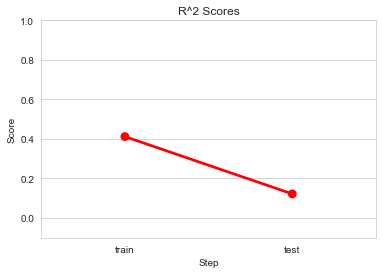

In [47]:
sns.pointplot(y=RFperf['Score'],x=RFperf['Step'],color='Red')
plt.ylim([-.1,1])
plt.title('R^2 Scores')
plt.savefig('RFScores.png',bbox_inches='tight')

In [48]:
predicted_test = rf.predict(x_test)

fI = pd.DataFrame()
fI['Variable'] = list(x_train.columns)
fI['Importance'] = rf.feature_importances_
fI.sort_values(by='Importance',ascending=False)[0:15]

,Variable,Importance
0,Page total likes,0.197057
4,Cat_1,0.122591
39,Mo_10,0.061867
9,We,0.060758
8,Sa,0.041622
22,hr__10,0.031804
1,Video,0.030371
10,Th,0.028610
33,Mo_5,0.028142
16,hr__4,0.027912


In [49]:
topVars= list(fI.sort_values(by='Importance',ascending=False)[0:15]['Variable'])
topVars

['Page total likes',
 'Cat_1',
 'Mo_10',
 'We',
 'Sa',
 'hr__10',
 'Video',
 'Th',
 'Mo_5',
 'hr__4',
 'Mo_2',
 'Mo_7',
 'Mo',
 'hr__9',
 'hr__2']

In [50]:
x = df[topVars]

In [51]:
x_train,x_test,y_train, y_test = train_test_split(x,
                                                  y, test_size=0.3,
                                                  random_state=50)

In [52]:
rf = RandomForestRegressor(n_estimators=500,min_samples_split=15)
rf.fit(x_train,y_train)

RandomForestRegressor(min_samples_split=15, n_estimators=500)

In [54]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
predicted_train = rf.predict(x_train)
predicted_test = rf.predict(x_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)

print(f"Test data R-2 score: {test_score}")
print(f'Test data Spearman correlation: {spearman[0]}')
print(f'Test data Pearson correlation: {pearson[0]}')

train_score = r2_score(y_train, predicted_train)
spearmanTrain = spearmanr(y_train, predicted_train)
pearsonTrain = pearsonr(y_train, predicted_train)

print(' ')

print(f'Train data R-2 score: {train_score}')
print(f'Train data Spearman correlation: {spearmanTrain[0]}')

Test data R-2 score: 0.14903062211854734
Test data Spearman correlation: 0.45612747139212517
Test data Pearson correlation: 0.39121903808633696
 
Train data R-2 score: 0.41134843130419174
Train data Spearman correlation: 0.6834059256654247


In [55]:
RFperf = pd.DataFrame()
RFperf['Score'] = [round(train_score,3),round(test_score,3)]
RFperf['Step'] = ['train','test']
RFperf

,Score,Step
0,0.411,train
1,0.149,test


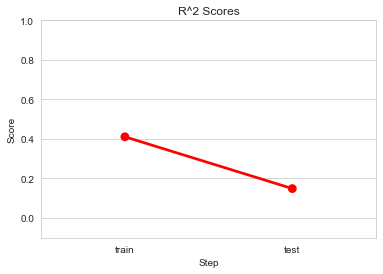

In [56]:
sns.pointplot(y=RFperf['Score'],x=RFperf['Step'],color='Red')
plt.ylim([-.1,1])
plt.title('R^2 Scores')
plt.savefig('RFScores.png',bbox_inches='tight')


References
(Moro et al., 2016) Moro, S., Rita, P., & Vala, B. (2016). Predicting social media performance metrics and evaluation of the impact on brand building: A data mining approach. Journal of Business Research, 69(9), 3341-3351.